# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('06-x_train-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('06-x_test-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('06-y_train-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('06-y_test-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)


# **BALANCEO DE DATOS**

In [3]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [4]:
overs = RandomOverSampler()

In [5]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [6]:
y_t_overs

,Emociones
0,0
1,3
2,3
3,3
4,0
...,...
571,2
572,2
573,2
574,2


# **NORMALIZACION DE CARACTERISTICAS**

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_t_overs)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [32]:
x_train_std

array([[ 0.15, -0.62,  0.33, ..., -1.13, -0.68,  0.23],
       [-0.79, -0.85,  0.52, ...,  0.21,  0.58, -2.04],
       [-0.71, -0.67,  0.44, ...,  0.21, -0.04, -1.07],
       ...,
       [-0.48, -0.18,  0.77, ..., -0.3 ,  0.91,  0.23],
       [-0.68, -0.77,  1.02, ...,  0.18,  1.11, -0.26],
       [-0.33,  0.01,  0.34, ..., -0.62,  2.2 ,  0.47]])

In [33]:
y_t_overs

,Emociones
0,0
1,3
2,3
3,3
4,0
...,...
571,2
572,2
573,2
574,2


# **MODELO DE MARCHINE LEARNING**

In [34]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               13312     
                                                                 
 dense_13 (Dense)            (None, 128)               65664     
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dense_15 (Dense)            (None, 4)                 132       
                                                                 
Total params: 83,236
Trainable params: 83,236
Non-trainable params: 0
_________________________________________________________________


In [35]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_t_overs)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I

Epoch 1/800
18/18 [==============================] - 1s 4ms/step - loss: 1.1347 - accuracy: 0.4583
Epoch 2/800
18/18 [==============================] - 0s 3ms/step - loss: 0.8942 - accuracy: 0.6111
Epoch 3/800
18/18 [==============================] - 0s 3ms/step - loss: 0.7913 - accuracy: 0.6319
Epoch 4/800
18/18 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.7257
Epoch 5/800
18/18 [==============================] - 0s 3ms/step - loss: 0.6347 - accuracy: 0.7465
Epoch 6/800
18/18 [==============================] - 0s 3ms/step - loss: 0.5620 - accuracy: 0.7812
Epoch 7/800
18/18 [==============================] - 0s 3ms/step - loss: 0.4941 - accuracy: 0.8125
Epoch 8/800
18/18 [==============================] - 0s 3ms/step - loss: 0.4538 - accuracy: 0.8438
Epoch 9/800
18/18 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.8628
Epoch 10/800
18/18 [==============================] - 0s 3ms/step - loss: 0.3651 - accuracy: 0.8785
Epoch 11/

array([0, 2, 1, 1, 2, 3, 3, 3, 3, 3, 3, 0, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 3, 3, 1, 0, 0, 0, 2, 2, 1, 3, 1, 3, 3, 1, 0, 2, 3, 0,
       0, 0, 1, 1, 2, 2, 3, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1,
       1, 2, 3, 2, 1, 2, 3, 0, 1, 3, 3, 3, 2, 3, 0, 0, 2, 3, 1, 0, 0, 1,
       1, 0, 0, 1, 3, 3, 1, 3, 1, 0, 0, 3, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2,
       0, 1, 1, 3, 1, 2, 0, 3, 0, 3, 2, 1, 1])

# **EVALUACION**

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.69      0.63      0.66        35
           2       0.61      0.82      0.70        17
           3       0.82      0.72      0.77        32

    accuracy                           0.76       123
   macro avg       0.74      0.76      0.75       123
weighted avg       0.76      0.76      0.76       123



In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.69      0.63      0.66        35
           2       0.61      0.82      0.70        17
           3       0.82      0.72      0.77        32

    accuracy                           0.76       123
   macro avg       0.74      0.76      0.75       123
weighted avg       0.76      0.76      0.76       123

Matriz de confusión, sin normalización
[[34  3  1  1]
 [ 6 22  5  2]
 [ 0  1 14  2]
 [ 0  6  3 23]]


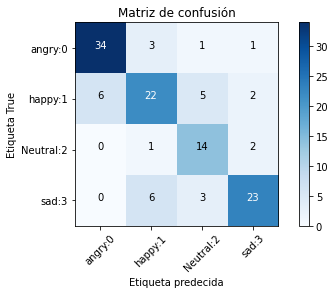

In [38]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')

# **GUARDANDO MODELOS **

Normalizacion

In [39]:
import joblib
joblib.dump(sc , '185_Normalizacion.pkl')

['185_Normalizacion.pkl']

Modelo entrenado

In [40]:
import joblib
joblib.dump(clf , '185_Modelo_Prueba.pkl')

INFO:tensorflow:Assets written to: ram://1c7ad53c-3188-470e-b42f-d939a66fb21b/assets


['185_Modelo_Prueba.pkl']